In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Load train and test datasets
train_df = pd.read_csv('/home/expygmalion/Projects/PythonProjects/ObestiyManagement/train_dataset.csv')
test_df = pd.read_csv('/home/expygmalion/Projects/PythonProjects/ObestiyManagement/test_dataset.csv')

In [133]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df

Train shape: (1900, 17)
Test shape: (211, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,NaN,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,NaN,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,NaN,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Female,47,1.64,81.98,yes,yes,2.04,1.42,Sometimes,no,1.83,no,0.00,0.000,no,Automobile,Obesity_Type_I
1896,Male,24,1.61,99.96,yes,yes,3.00,1.42,Sometimes,no,1.00,no,1.19,1.384,no,Public_Transportation,Obesity_Type_II
1897,Male,25,1.83,118.42,yes,yes,1.46,3.00,Sometimes,no,2.36,no,1.14,0.101,Sometimes,Public_Transportation,Obesity_Type_II
1898,Male,23,1.65,94.79,yes,yes,2.00,3.00,Sometimes,no,1.49,no,0.65,1.000,no,Public_Transportation,Obesity_Type_I


In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1900 non-null   object 
 1   Age                             1900 non-null   int64  
 2   Height                          1900 non-null   float64
 3   Weight                          1900 non-null   float64
 4   family_history_with_overweight  1900 non-null   object 
 5   FAVC                            1900 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1900 non-null   float64
 8   CAEC                            1900 non-null   object 
 9   SMOKE                           1900 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  SCC                             1900 non-null   object 
 12  FAF                             19

In [135]:
test_df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [136]:
train_df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [137]:
print(test_df.duplicated().sum())

0


In [138]:
print(train_df.duplicated().sum())

22


In [139]:
train_df_duplicates_handled = train_df.drop_duplicates()

In [140]:
print(train_df_duplicates_handled.duplicated().sum())

0


In [141]:
train_df_duplicates_handled_drop_missing = train_df_duplicates_handled.dropna()

In [142]:
train_df_duplicates_handled_drop_missing.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

train_df_duplicates_handled_drop_missing

In [143]:
train_df_duplicates_handled_drop_missing['BMI'] = train_df_duplicates_handled_drop_missing['Weight'] / (train_df_duplicates_handled_drop_missing['Height'] ** 2)
train_df_duplicates_handled_drop_missing['Hydration'] = train_df_duplicates_handled_drop_missing['CH2O'] / train_df_duplicates_handled_drop_missing['NCP']
train_df_duplicates_handled_drop_missing['CalorieBurnProxy'] = train_df_duplicates_handled_drop_missing['FAF'] * train_df_duplicates_handled_drop_missing['Weight']
train_df_duplicates_handled_drop_missing.head()


/tmp/ipykernel_36537/3292649639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing['BMI'] = train_df_duplicates_handled_drop_missing['Weight'] / (train_df_duplicates_handled_drop_missing['Height'] ** 2)
/tmp/ipykernel_36537/3292649639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing['Hydration'] = train_df_duplicates_handled_drop_missing['CH2O'] / train_df_duplicates_handled_drop_missing['NCP']
/tmp/ipykernel_36537/3292649

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Hydration,CalorieBurnProxy
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III,42.899408,0.903333,284.2000
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II,29.022921,1.406593,130.6858
10,Male,18,1.72,53.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,2.000,Sometimes,Public_Transportation,Insufficient_Weight,17.915089,0.666667,0.0000
11,Female,20,1.60,44.81,no,no,3.00,2.97,Frequently,no,1.15,yes,0.88,0.000,Sometimes,Public_Transportation,Insufficient_Weight,17.503906,0.387205,39.4328
12,Female,37,1.51,63.18,yes,yes,2.05,1.05,Sometimes,no,2.00,no,0.15,0.226,Sometimes,Automobile,Overweight_Level_I,27.709311,1.904762,9.4770


### Engineered features

In [144]:
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)
test_df['Hydration'] = test_df['CH2O'] / test_df['NCP']
test_df['CalorieBurnProxy'] = test_df['FAF'] * test_df['Weight']



loop in dtype.integer

In [145]:
features_numbers = ['Age','Height','Weight','BMI','Hydration','CalorieBurnProxy'] ## goes into standard scaling
features_nominal = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'] ## goes into one hot encoding
feature_ordinal = ['FCVC','NCP','CH2O', 'CAEC', 'FAF','CALC', 'TUE', 'NObeyesdad' ] ## goes into label encoding
label_encoders = ['CAEC', 'CALC', 'NObeyesdad']
hot_encoders = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'] 
scale_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CAEC', 'CALC','BMI','Hydration','CalorieBurnProxy' ]



In [146]:
import pandas as pd

Before Dropping Outliers:

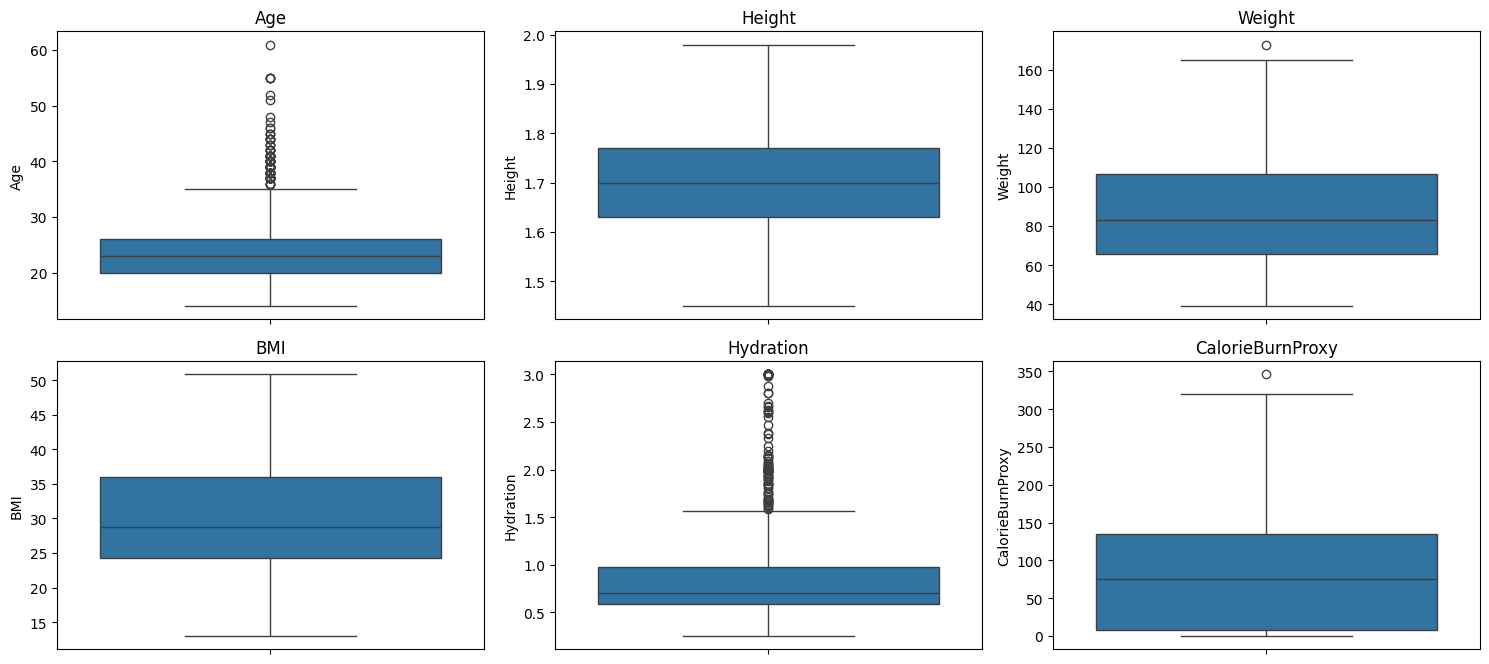

In [147]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_numbers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df_duplicates_handled_drop_missing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

After Dropping Outliers:


In [148]:
for col in features_numbers:
        if pd.api.types.is_numeric_dtype(train_df_duplicates_handled_drop_missing[col]):
            Q1 = train_df_duplicates_handled_drop_missing[col].quantile(0.25)
            Q3 = train_df_duplicates_handled_drop_missing[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers
            train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
            train_df=train_df_duplicates_handled_drop_missing[col]


/tmp/ipykernel_36537/2445984840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_36537/2445984840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[col] = train_df_duplicates_handled_drop_missing[col].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipykernel_36537/2445984840.py:10: SettingWithCopyWarning: 
A va

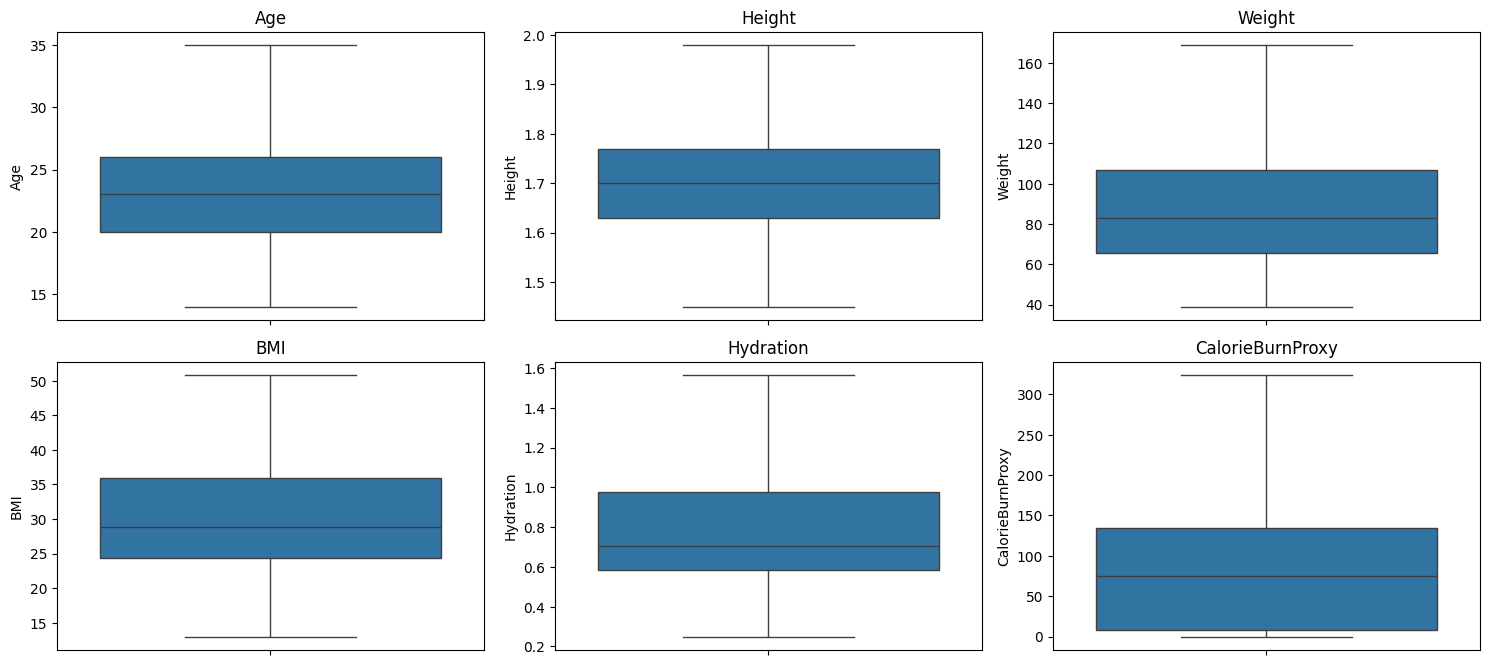

In [149]:


# Create a grid of boxplots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_numbers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_df_duplicates_handled_drop_missing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Encoding:

In [150]:
from sklearn.preprocessing import LabelEncoder

# List of features to encode
label_encoders = ['CAEC', 'CALC', 'NObeyesdad']

# Create a dictionary to store the label encoders
encoders = {}

# Iterate through each feature and encode it
for feature in label_encoders:
    # Create a new label encoder for each feature
    encoders[feature] = LabelEncoder()
    
    # Fit and transform the training data
    train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])
    
    # Transform the test data using the same encoder
    test_df[feature] = encoders[feature].transform(test_df[feature])
    
    # Print the mapping for each feature
    print(f"\nMapping for {feature}:")
    for i, label in enumerate(encoders[feature].classes_):
        print(f"{label} → {i}")

        train_df_duplicates_handled_drop_missing



Mapping for CAEC:
Always → 0
Frequently → 1
Sometimes → 2
no → 3

Mapping for CALC:
Always → 0
Frequently → 1
Sometimes → 2
no → 3

Mapping for NObeyesdad:
Insufficient_Weight → 0
Normal_Weight → 1
Obesity_Type_I → 2
Obesity_Type_II → 3
Obesity_Type_III → 4
Overweight_Level_I → 5
Overweight_Level_II → 6


/tmp/ipykernel_36537/3160910232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])
/tmp/ipykernel_36537/3160910232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_duplicates_handled_drop_missing[feature] = encoders[feature].fit_transform(train_df_duplicates_handled_drop_missing[feature])
/tmp/ipykernel_36537/3160910232.py:15: SettingWithCopyWarning: 
A value 

In [151]:
x_train  = train_df_duplicates_handled_drop_missing.drop('NObeyesdad', axis=1)
y_train = train_df_duplicates_handled_drop_missing['NObeyesdad']

x_test = test_df.drop('NObeyesdad', axis=1)
y_test = test_df['NObeyesdad']

print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())



    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female   18    1.82  142.10                            yes  yes  3.00   
1     Male   32    1.84   98.26                            yes  yes  2.33   
10    Male   18    1.72   53.00                            yes  yes  2.00   
11  Female   20    1.60   44.81                             no   no  3.00   
12  Female   35    1.51   63.18                            yes  yes  2.05   

     NCP  CAEC SMOKE  CH2O  SCC   FAF    TUE  CALC                 MTRANS  \
0   3.00     2    no  2.71   no  2.00  0.814     2  Public_Transportation   
1   1.82     2    no  2.56   no  1.33  0.481     2             Automobile   
10  3.00     2    no  2.00   no  0.00  2.000     2  Public_Transportation   
11  2.97     1    no  1.15  yes  0.88  0.000     2  Public_Transportation   
12  1.05     2    no  2.00   no  0.15  0.226     2             Automobile   

          BMI  Hydration  CalorieBurnProxy  
0   42.899408   0.903333     

## Hot Encoding for the rest of the features

In [152]:
x_train_encoded = pd.get_dummies(x_train, columns=hot_encoders, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=hot_encoders, drop_first=True)

In [153]:
x_train_encoded.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,18,1.82,142.10,3.00,3.00,2,2.71,2.00,0.814,2,...,284.2000,False,True,True,False,False,False,False,True,False
1,32,1.84,98.26,2.33,1.82,2,2.56,1.33,0.481,2,...,130.6858,True,True,True,False,False,False,False,False,False
10,18,1.72,53.00,2.00,3.00,2,2.00,0.00,2.000,2,...,0.0000,True,True,True,False,False,False,False,True,False
11,20,1.60,44.81,3.00,2.97,1,1.15,0.88,0.000,2,...,39.4328,False,False,False,False,True,False,False,True,False
12,35,1.51,63.18,2.05,1.05,2,2.00,0.15,0.226,2,...,9.4770,False,True,True,False,False,False,False,False,False


In [154]:
x_test_encoded.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,35,1.71,84.72,2.88,3.0,2,3.00,2.00,0.832,3,...,169.4400,True,True,True,False,False,False,False,False,False
1,19,1.75,100.00,2.00,3.0,1,2.00,2.00,0.000,3,...,200.0000,True,True,True,False,False,False,False,True,False
2,19,1.85,65.00,2.00,3.0,2,3.00,2.00,1.000,2,...,130.0000,True,True,False,False,False,True,False,False,False
3,31,1.78,120.64,2.50,3.0,2,2.04,0.84,0.490,2,...,101.3376,True,True,True,False,False,False,False,False,False
4,25,1.80,120.90,2.20,3.0,2,2.51,1.66,0.128,2,...,200.6940,True,True,True,False,False,False,False,True,False


In [155]:
y_test.head()

0    6
1    2
2    1
3    3
4    3
Name: NObeyesdad, dtype: int64

In [156]:
y_train.head()

0     4
1     6
10    0
11    0
12    5
Name: NObeyesdad, dtype: int64

### StandardScaler – zero mean, unit variance

In [157]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
x_train_encoded_std = x_train_encoded.copy()
x_test_encoded_std = x_test_encoded.copy()

# Fit on train, transform train
x_train_encoded_std[scale_features] = scaler_std.fit_transform(x_train_encoded[scale_features])
# Transform test
x_test_encoded_std[scale_features] = scaler_std.transform(x_test_encoded[scale_features])


x_train_encoded_std.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.121948,1.273711,2.126584,1.078868,0.390565,0.317214,1.145790,1.156649,0.235845,-0.522707,...,2.581592,False,True,True,False,False,False,False,True,False
1,1.544915,1.489521,0.446618,-0.171765,-1.144630,0.317214,0.898203,0.375426,-0.312692,-0.522707,...,0.581266,True,True,True,False,False,False,False,False,False
10,-1.121948,0.194662,-1.287763,-0.787749,0.390565,0.317214,-0.026121,-1.175361,2.189490,-0.522707,...,-1.121601,True,True,True,False,False,False,False,True,False
11,-0.740968,-1.100197,-1.601607,1.078868,0.351535,-1.887724,-1.429112,-0.149276,-1.105022,-0.522707,...,-0.607783,False,False,False,False,True,False,False,True,False
12,2.116386,-2.071341,-0.897662,-0.694418,-2.146409,0.317214,-0.026121,-1.000460,-0.732742,-0.522707,...,-0.998114,False,True,True,False,False,False,False,False,False


### MinMaxScaler – scale to range [0, 1]

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
x_train_encoded_minmax = x_train_encoded.copy()
x_test_encoded_minmax = x_test_encoded.copy()

x_train_encoded_minmax[scale_features] = scaler_minmax.fit_transform(x_train_encoded[scale_features])
x_test_encoded_minmax[scale_features] = scaler_minmax.transform(x_test_encoded[scale_features])

x_train_encoded_minmax.head()


,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.190476,0.698113,0.793603,1.000,0.666667,0.666667,0.855,0.666667,0.4070,0.666667,...,0.876776,False,True,True,False,False,False,False,True,False
1,0.857143,0.735849,0.456149,0.665,0.273333,0.666667,0.780,0.443333,0.2405,0.666667,...,0.403175,True,True,True,False,False,False,False,False,False
10,0.190476,0.509434,0.107764,0.500,0.666667,0.666667,0.500,0.000000,1.0000,0.666667,...,0.000000,True,True,True,False,False,False,False,True,False
11,0.285714,0.283019,0.044722,1.000,0.656667,0.333333,0.075,0.293333,0.0000,0.666667,...,0.121653,False,False,False,False,True,False,False,True,False
12,1.000000,0.113208,0.186123,0.525,0.016667,0.666667,0.500,0.050000,0.1130,0.666667,...,0.029237,False,True,True,False,False,False,False,False,False


In [159]:
x_train_encoded

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,CalorieBurnProxy,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,18,1.82,142.10,3.00,3.00,2,2.71,2.00,0.814,2,...,284.2000,False,True,True,False,False,False,False,True,False
1,32,1.84,98.26,2.33,1.82,2,2.56,1.33,0.481,2,...,130.6858,True,True,True,False,False,False,False,False,False
10,18,1.72,53.00,2.00,3.00,2,2.00,0.00,2.000,2,...,0.0000,True,True,True,False,False,False,False,True,False
11,20,1.60,44.81,3.00,2.97,1,1.15,0.88,0.000,2,...,39.4328,False,False,False,False,True,False,False,True,False
12,35,1.51,63.18,2.05,1.05,2,2.00,0.15,0.226,2,...,9.4770,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,35,1.64,81.98,2.04,1.42,2,1.83,0.00,0.000,3,...,0.0000,False,True,True,False,False,False,False,False,False
1896,24,1.61,99.96,3.00,1.42,2,1.00,1.19,1.384,3,...,118.9524,True,True,True,False,False,False,False,True,False
1897,25,1.83,118.42,1.46,3.00,2,2.36,1.14,0.101,2,...,134.9988,True,True,True,False,False,False,False,True,False
1898,23,1.65,94.79,2.00,3.00,2,1.49,0.65,1.000,3,...,61.6135,True,True,True,False,False,False,False,True,False


## Feature selection

### 1. Pearson for KNN, Linear, SVM

In [160]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use f_classif which relies on correlation and works for classification problems
selector_pearson = SelectKBest(score_func=f_classif, k=10)


x_train_pearson = selector_pearson.fit_transform(x_train_encoded_std, y_train)
x_test_pearson = selector_pearson.transform(x_test_encoded_std)

# Get the selected feature names
pearson_features = x_train_encoded_std.columns[selector_pearson.get_support()]

# Convert to DataFrame
x_train_pearson = pd.DataFrame(x_train_pearson, columns=pearson_features)
x_test_pearson = pd.DataFrame(x_test_pearson, columns=pearson_features)


x_test_pearson


,Age,Height,Weight,FCVC,CAEC,CALC,BMI,Gender_Male,family_history_with_overweight_yes,FAVC_yes
0,2.116386,0.086757,-0.072240,0.854874,0.317214,1.399102,-0.091683,1.0,1.0,1.0
1,-0.931458,0.518377,0.513295,-0.787749,-1.887724,1.399102,0.366621,1.0,1.0,1.0
2,-0.931458,1.597426,-0.827918,-0.787749,0.317214,-0.522707,-1.334698,1.0,1.0,0.0
3,1.354425,0.842092,1.304228,0.145560,0.317214,-0.522707,1.041980,1.0,1.0,1.0
4,0.211483,1.057902,1.314192,-0.414426,0.317214,-0.522707,0.947184,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
206,0.401974,-0.344862,0.689186,1.078868,0.317214,-0.522707,0.970526,0.0,1.0,1.0
207,-0.740968,1.813236,-0.444714,-0.787749,-1.887724,-0.522707,-1.028883,1.0,0.0,1.0
208,0.592464,0.734187,1.208810,-0.451758,0.317214,-0.522707,0.996731,1.0,1.0,0.0
209,1.354425,2.029046,1.637999,0.145560,0.317214,-0.522707,0.809742,1.0,1.0,1.0


In [161]:
pearson_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'CAEC', 'CALC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes'],
      dtype='object')

### 2. Chi-squared for Logistic Regression

In [162]:

from sklearn.feature_selection import SelectKBest, chi2


selector = SelectKBest(score_func=chi2, k=10)
x_train_chi = selector.fit_transform(x_train_encoded_minmax, y_train)
x_test_chi = selector.transform(x_test_encoded_minmax)

# Get selected feature names
chi_features = x_train_encoded_minmax.columns[selector.get_support()]

# Create DataFrames for selected f
# x_train_chieatures
x_train_chi = pd.DataFrame(x_train_chi, columns=chi_features)
x_test_chi = pd.DataFrame(x_test_chi, columns=chi_features)

x_train_chi

,Age,Weight,FCVC,BMI,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,MTRANS_Public_Transportation,MTRANS_Walking
0,0.190476,0.793603,1.000,0.790645,0.0,1.0,0.0,0.0,1.0,0.0
1,0.857143,0.456149,0.665,0.423723,1.0,1.0,0.0,0.0,0.0,0.0
2,0.190476,0.107764,0.500,0.130010,1.0,1.0,0.0,0.0,1.0,0.0
3,0.285714,0.044722,1.000,0.119137,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000000,0.186123,0.525,0.388988,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1837,1.000000,0.330835,0.520,0.462261,0.0,1.0,0.0,0.0,0.0,0.0
1838,0.476190,0.469234,1.000,0.675990,1.0,1.0,0.0,0.0,1.0,0.0
1839,0.523810,0.611329,0.230,0.591311,1.0,1.0,0.0,0.0,1.0,0.0
1840,0.428571,0.429439,0.500,0.576937,1.0,1.0,0.0,0.0,1.0,0.0


In [163]:
chi_features

Index(['Age', 'Weight', 'FCVC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'SMOKE_yes', 'SCC_yes',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [164]:
#  index after DataFrame transformations
# To avoid index mismatches later in training/plotting:
x_train_pearson.reset_index(drop=True, inplace=True)
x_test_pearson.reset_index(drop=True, inplace=True)
x_train_chi.reset_index(drop=True, inplace=True)
x_test_chi.reset_index(drop=True, inplace=True)


# Setting the features ready for modeling:


 We aim to validate the data's readiness for training by imposing checks and verifying some metrics relevant to each of the four select models we are to build (SVM, KNN, Linear, Logistic).


## Feature Correlation check

In [165]:
pearson_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'CAEC', 'CALC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes'],
      dtype='object')

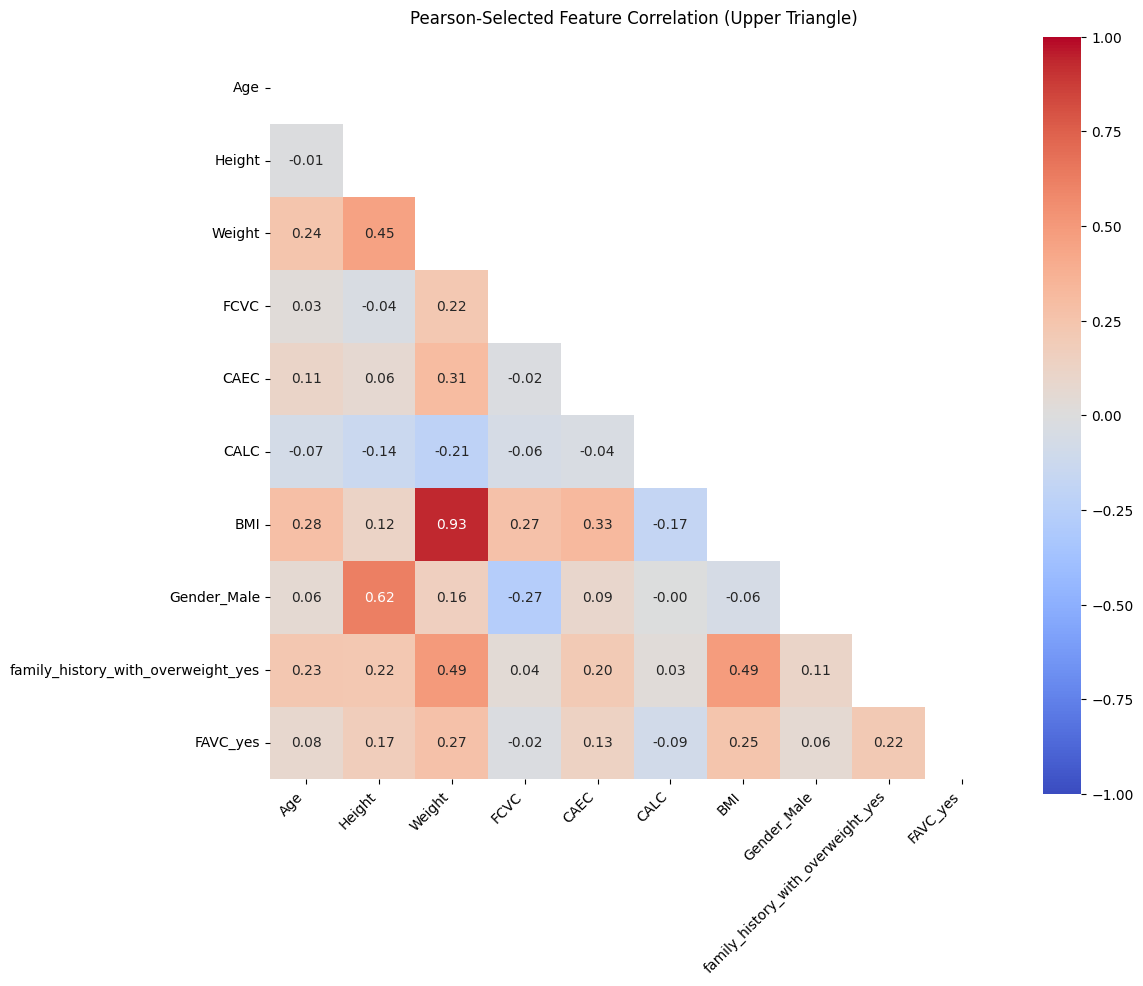

In [166]:
import numpy as np 
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(x_train_pearson[pearson_features].corr(), dtype=bool))
sns.heatmap(x_train_pearson[pearson_features].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=mask,
            square=True)
plt.title("Pearson-Selected Feature Correlation (Upper Triangle)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We must drop the highly correlated features first:

In [167]:
x_train_pearson.drop('Weight', axis=1, inplace=True)
x_test_pearson.drop('Weight', axis=1, inplace=True)
pearson_features = pearson_features.drop('Weight')


pearson_features

Index(['Age', 'Height', 'FCVC', 'CAEC', 'CALC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes'],
      dtype='object')

In [168]:
chi_features

Index(['Age', 'Weight', 'FCVC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'SMOKE_yes', 'SCC_yes',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

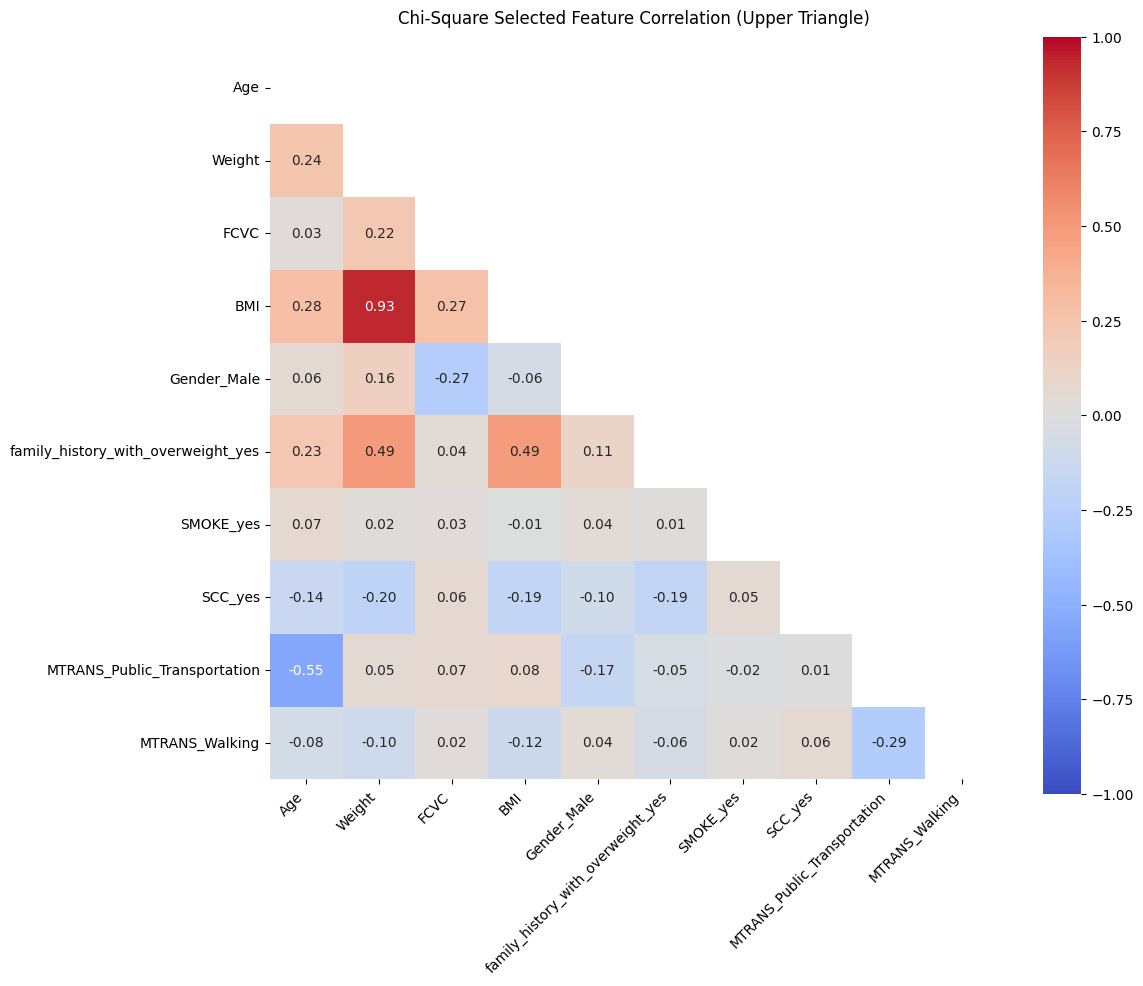

In [169]:
import numpy as np 
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(x_train_chi[chi_features].corr(), dtype=bool))
sns.heatmap(x_train_chi[chi_features].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=mask,
            square=True)
plt.title("Chi-Square Selected Feature Correlation (Upper Triangle)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observation: we must drop the highly correlated features.

In [170]:
x_train_chi.drop('Weight', axis=1, inplace=True)
x_test_chi.drop('Weight', axis=1, inplace=True)
chi_features= chi_features.drop('Weight')


pearson_features

Index(['Age', 'Height', 'FCVC', 'CAEC', 'CALC', 'BMI', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes'],
      dtype='object')

## Distance Check for KNN 

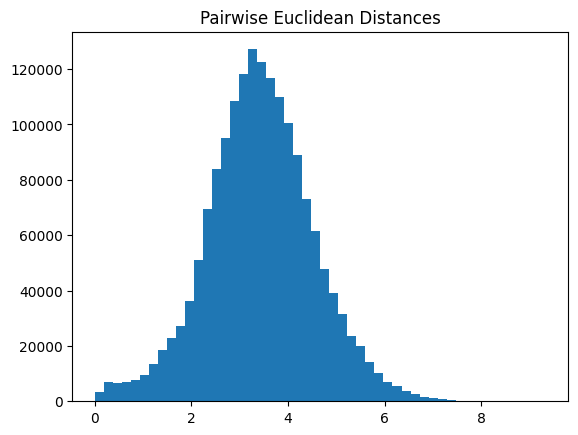

In [171]:
from scipy.spatial.distance import pdist, squareform
dists = pdist(x_train_pearson.values, metric='euclidean')
plt.hist(dists, bins=50)
plt.title("Pairwise Euclidean Distances")
plt.show()


Observation: Bell shaped, no narrow peak.

## Class Balance Check 
We check for imbalanced classes that would potentially bias model's prediction.

<Axes: xlabel='NObeyesdad'>

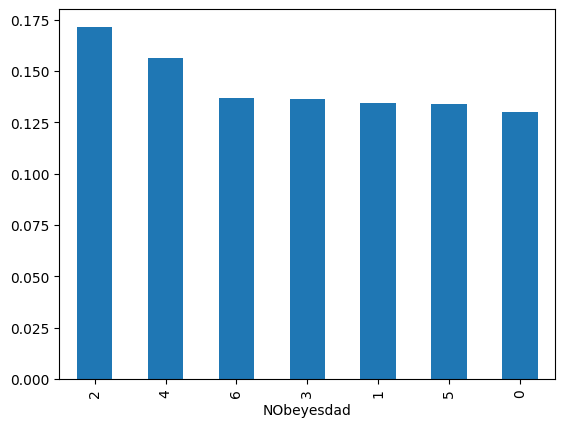

In [172]:
y_train.value_counts(normalize=True).plot(kind='bar')

 Observation: All classes have < 10–15% class weights.

## Scaling check

SVM and KNN are sensitive to distance metrics. Scaling ensures no feature dominates.

In [173]:
x_train_encoded_std[scale_features].describe().T[['mean', 'std']]

,mean,std
Age,-1.465832e-16,1.000272
Height,-1.677992e-15,1.000272
Weight,2.815940e-16,1.000272
FCVC,-3.857452e-16,1.000272
NCP,1.938370e-16,1.000272
CH2O,1.195810e-16,1.000272
FAF,-7.039851e-17,1.000272
TUE,-2.121599e-17,1.000272
CAEC,1.706923e-16,1.000272
CALC,1.340465e-16,1.000272


Observation: All means close to 0, all stds are ~1.

 ## Skewness Check 


For Linear/Logistics: 
Extreme skewness can degrade model performance. 

In [174]:
x_train_encoded_std[scale_features].skew()


Age                 0.789443
Height             -0.009905
Weight              0.245528
FCVC               -0.445004
NCP                -1.130226
CH2O               -0.111153
FAF                 0.507300
TUE                 0.587810
CAEC               -2.061814
CALC                0.196642
BMI                 0.151724
Hydration           0.848094
CalorieBurnProxy    0.662079
dtype: float64

# Formalizing: